In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data-test-analytics.csv')
df.head()

,id,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,08/15/17 07:05 AM,01/14/21 11:23 AM,NaN,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,07/10/74 12:00 AM,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,01/14/21 11:23 AM,151.142942,10,906.857651,6,35,crm
1,a39535b5-4647-4680-b4f6-3aed57c1f1ff,12/31/19 09:53 PM,01/08/21 11:23 AM,NaN,de448fcb47d0d6a873b2eef52b5ee595,72678bb35e2ac84ed373e81dd9dca28c,22f1cfa1847f38da3f3cb114dd2b9247,07/06/40 12:00 AM,paused,3.30.12,Fernandes,RR,Santa Isabel,01/08/21 11:23 AM,236.991790,4,236.991790,1,41,organic_search
2,dc067cd2-c021-42bd-8c0e-beb267280e66,03/07/19 11:46 PM,01/07/21 11:23 AM,NaN,cb09e447ddc38283373d56bb46498e6a,668f4ee9add29c7bd02c485f1b7509e3,6cb47446a086ee6483b3eb954f11467a,03/18/63 12:00 AM,active,3.28.9,Lopes,RR,Estrela,01/07/21 11:23 AM,211.955597,13,2331.511572,11,42,organic_search
3,b5e4caeb-3a9b-49ed-aa33-5acd06b162c1,07/21/18 10:17 AM,01/10/21 11:23 AM,NaN,52593437a405b11b3557170680ef80c8,d3fb45188d95c8d7cc49da5b4f727c86,0a6f0c54db1e6f19347f96b50f8092a4,11/21/80 12:00 AM,active,3.34.3,Campos do Campo,PE,Confisco,01/10/21 11:23 AM,204.113227,8,1224.679359,6,39,organic_search
4,d4ff61fc-f008-4e19-b8ae-bd70cfa3ae27,06/08/18 12:09 PM,01/18/21 11:23 AM,NaN,dbda4b778a966c21904238ed2d2005db,a0f76bc49b4c43327b536da6e1a1465e,143b9f169b4fa1692f6d79b5682169b5,07/07/59 12:00 AM,active,3.19.8,das Neves,RJ,Vila Suzana Segunda Seção,01/18/21 11:23 AM,252.940997,9,2023.527980,8,31,crm


In [3]:
new_df = df.copy()

In [4]:
nasc = new_df.birth_date.str.split(' ', expand=True).get(0)


# definir uma função personalizada para formatar a data
def format_date(date_str):
    year = int(date_str.split('/')[-1])
    if year < 100:
        year += 1900
    return '{}/{}/{}'.format(date_str[:2], date_str[3:5], year)

# aplicar a função na coluna 'birth_date' para formatar a data corretamente
new_df['birth_date'] = nasc.apply(format_date)
datas = ['created_at', 'updated_at', 'birth_date', 'deleted_at', 'last_date_purchase']

for v, k in enumerate(datas):
    new_df[k] = pd.to_datetime(new_df[k])
new_df.head()

,id,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,2017-08-15 07:05:00,2021-01-14 11:23:00,NaT,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,1974-07-10,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,2021-01-14 11:23:00,151.142942,10,906.857651,6,35,crm
1,a39535b5-4647-4680-b4f6-3aed57c1f1ff,2019-12-31 21:53:00,2021-01-08 11:23:00,NaT,de448fcb47d0d6a873b2eef52b5ee595,72678bb35e2ac84ed373e81dd9dca28c,22f1cfa1847f38da3f3cb114dd2b9247,1940-07-06,paused,3.30.12,Fernandes,RR,Santa Isabel,2021-01-08 11:23:00,236.991790,4,236.991790,1,41,organic_search
2,dc067cd2-c021-42bd-8c0e-beb267280e66,2019-03-07 23:46:00,2021-01-07 11:23:00,NaT,cb09e447ddc38283373d56bb46498e6a,668f4ee9add29c7bd02c485f1b7509e3,6cb47446a086ee6483b3eb954f11467a,1963-03-18,active,3.28.9,Lopes,RR,Estrela,2021-01-07 11:23:00,211.955597,13,2331.511572,11,42,organic_search
3,b5e4caeb-3a9b-49ed-aa33-5acd06b162c1,2018-07-21 10:17:00,2021-01-10 11:23:00,NaT,52593437a405b11b3557170680ef80c8,d3fb45188d95c8d7cc49da5b4f727c86,0a6f0c54db1e6f19347f96b50f8092a4,1980-11-21,active,3.34.3,Campos do Campo,PE,Confisco,2021-01-10 11:23:00,204.113227,8,1224.679359,6,39,organic_search
4,d4ff61fc-f008-4e19-b8ae-bd70cfa3ae27,2018-06-08 12:09:00,2021-01-18 11:23:00,NaT,dbda4b778a966c21904238ed2d2005db,a0f76bc49b4c43327b536da6e1a1465e,143b9f169b4fa1692f6d79b5682169b5,1959-07-07,active,3.19.8,das Neves,RJ,Vila Suzana Segunda Seção,2021-01-18 11:23:00,252.940997,9,2023.527980,8,31,crm


In [5]:
new_df.drop(['id', 'name_hash', 'email_hash', 'address_hash'], axis=1, inplace=True)
new_df['time_lastbuy'] = (new_df['deleted_at'] - new_df['last_date_purchase']).dt.days
new_df['client_cancel_age'] = ((new_df['deleted_at'] - new_df['birth_date']).dt.days/365).round()
new_df['client_time'] = (new_df['deleted_at'] - new_df['created_at']).dt.days
new_df.head()

,created_at,updated_at,deleted_at,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source,time_lastbuy,client_cancel_age,client_time
0,2017-08-15 07:05:00,2021-01-14 11:23:00,NaT,1974-07-10,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,2021-01-14 11:23:00,151.142942,10,906.857651,6,35,crm,NaN,NaN,NaN
1,2019-12-31 21:53:00,2021-01-08 11:23:00,NaT,1940-07-06,paused,3.30.12,Fernandes,RR,Santa Isabel,2021-01-08 11:23:00,236.991790,4,236.991790,1,41,organic_search,NaN,NaN,NaN
2,2019-03-07 23:46:00,2021-01-07 11:23:00,NaT,1963-03-18,active,3.28.9,Lopes,RR,Estrela,2021-01-07 11:23:00,211.955597,13,2331.511572,11,42,organic_search,NaN,NaN,NaN
3,2018-07-21 10:17:00,2021-01-10 11:23:00,NaT,1980-11-21,active,3.34.3,Campos do Campo,PE,Confisco,2021-01-10 11:23:00,204.113227,8,1224.679359,6,39,organic_search,NaN,NaN,NaN
4,2018-06-08 12:09:00,2021-01-18 11:23:00,NaT,1959-07-07,active,3.19.8,das Neves,RJ,Vila Suzana Segunda Seção,2021-01-18 11:23:00,252.940997,9,2023.527980,8,31,crm,NaN,NaN,NaN


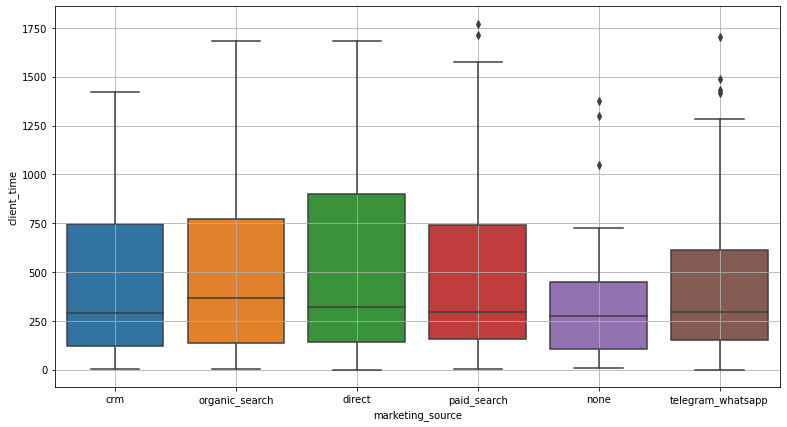

In [43]:
plt.figure(figsize=(13,7))
sns.boxplot(y='client_time', x='marketing_source', data=new_df)
plt.grid()

## Criando coluna de região para facilitar a compreensão geográfica do problema de negócios

In [8]:
# Dicionário de correspondência entre siglas e regiões
region_dict = {'AC': 'Norte', 'AL': 'Nordeste', 'AP': 'Norte', 'AM': 'Norte', 'BA': 'Nordeste',
               'CE': 'Nordeste', 'DF': 'Centro-Oeste', 'ES': 'Sudeste', 'GO': 'Centro-Oeste',
               'MA': 'Nordeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste', 'MG': 'Sudeste',
               'PA': 'Norte', 'PB': 'Nordeste', 'PR': 'Sul', 'PE': 'Nordeste', 'PI': 'Nordeste',
               'RJ': 'Sudeste', 'RN': 'Nordeste', 'RS': 'Sul', 'RO': 'Norte', 'RR': 'Norte',
               'SC': 'Sul', 'SP': 'Sudeste', 'SE': 'Nordeste', 'TO': 'Norte'}

# Mapeia as siglas dos estados para as regiões do Brasil
new_df['region'] = new_df['state'].map(region_dict)

In [9]:
## Todo o período

(new_df[new_df['status'] == 'canceled']['region'].value_counts()/
 new_df[new_df['status'] == 'canceled']['region'].value_counts().sum())*100

Nordeste        33.267327
Norte           27.722772
Centro-Oeste    15.841584
Sudeste         12.475248
Sul             10.693069
Name: region, dtype: float64

In [10]:
## Todo o período

(new_df[new_df['status'] == 'canceled']['marketing_source'].value_counts()/
 new_df[new_df['status'] == 'canceled']['marketing_source'].value_counts().sum())*100

organic_search       38.811881
direct               19.009901
paid_search          13.861386
telegram_whatsapp    13.069307
crm                   8.514851
none                  6.732673
Name: marketing_source, dtype: float64

In [11]:
## Criação de duas colunas: Uma que referencia mês e ano de cadastro do cliente, 
## e outra que referencia o mês e ano de cancelamento de cadastro (se houver)

new_df["month_year_cancel"] = new_df["deleted_at"].dt.strftime("%Y-%m")
new_df["month_year_sign"] = new_df["created_at"].dt.strftime("%Y-%m")

In [12]:
new_df['quarter_sign'] = new_df['created_at'].dt.year.astype(str).str.cat(new_df['created_at'].dt.quarter.astype(str), sep='-')
new_df['quarter_cancel'] = new_df['deleted_at'].dt.year.astype(str).str.cat(new_df['deleted_at'].dt.quarter.astype(str), sep='-')

In [13]:
new_df['quarter_cancel'] = new_df['quarter_cancel'].replace('nan-nan', None)

## Gráfico indicativo do percentual de churns por mês ao longo do tempo

A partir de Novembro de 2016 quando os números começaram a ficar mais estáveis, até Novembro de 2019, a mediana de churns se concentrou em torno de 0.12%. A partir dessa data, os números começaram a inflar cada vez mais, chegando ao pico de 0.40% aproximadamente em Dezembro de 2020.

Vale lembrar que isso acontecia enquanto o número de clientes ativos em cada início de mês vinha crescendo linearmente desde o começo dos registros.

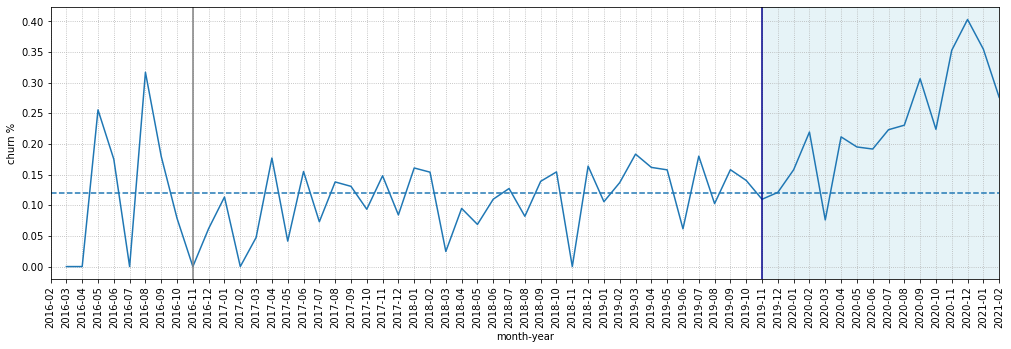

In [14]:
churn_table = pd.read_csv('churn_table.csv', index_col='Unnamed: 0')

plt.figure(figsize=(17,5))
sns.lineplot(x='month-year', y='churn %',
             data=churn_table)

plt.axhline(0.12, linestyle='--')


plt.axvline('2016-11', color='gray')
plt.axvline('2019-11', color='darkblue')
plt.axvspan('2019-11', '2021-02', alpha=0.3, color='lightblue')

plt.xlim('2016-02', '2021-02')
plt.xticks(rotation=90)
plt.grid(linestyle=':');

0.1204801846084846


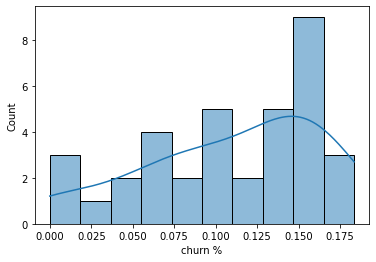

In [15]:
sns.histplot(churn_table[(churn_table['month-year'] >= '2016-11') 
                         & (churn_table['month-year'] < '2019-11')]['churn %'], bins=10,kde=True);

print(churn_table[(churn_table['month-year'] >= '2016-11') 
                  & (churn_table['month-year'] < '2019-11')]['churn %'].median())

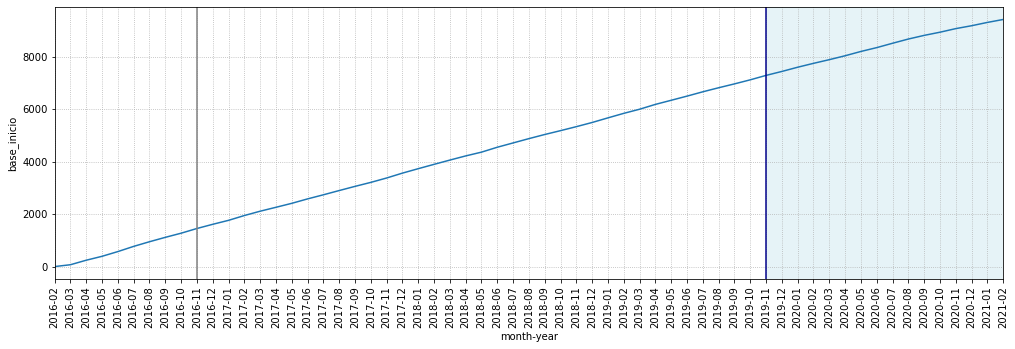

In [16]:
plt.figure(figsize=(17,5))
sns.lineplot(x='month-year', y='base_inicio',
             data=churn_table)

plt.axvline('2016-11', color='gray')
plt.axvline('2019-11', color='darkblue')
plt.axvspan('2019-11', '2021-02', alpha=0.3, color='lightblue')

plt.xlim('2016-02', '2021-02')
plt.xticks(rotation=90)
plt.grid(linestyle=':');

In [17]:
    churn_table

,month-year,cancelados,base_inicio,churn %
0,2016-02,0,0.0,NaN
1,2016-03,0,70.0,0.000000
2,2016-04,0,242.0,0.000000
3,2016-05,1,391.0,0.255754
4,2016-06,1,571.0,0.175131
...,...,...,...,...
56,2020-10,20,8928.0,0.224014
57,2020-11,32,9065.0,0.353006
58,2020-12,37,9175.0,0.403270
59,2021-01,33,9301.0,0.354801


## Gráfico indicativo do número de cadastros por mês ao longo do tempo

- A partir de Agosto de 2020, o número de novos cadastros permaneceu majoritariamente abaixo de 160

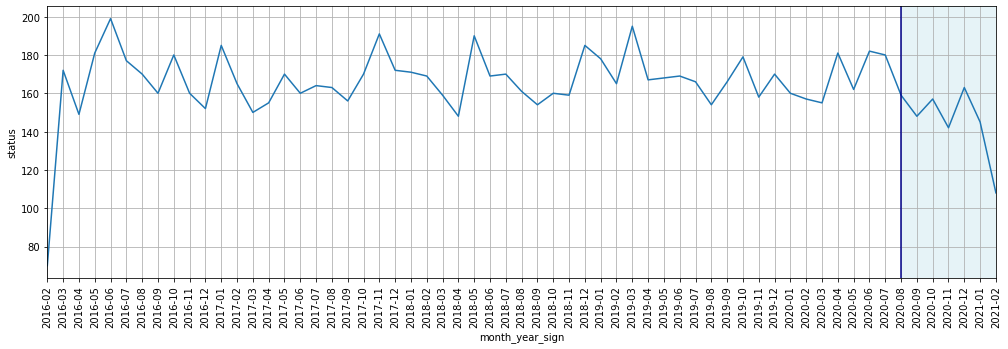

In [18]:
plt.figure(figsize=(17,5))
sns.lineplot(x='month_year_sign', y='status',
             data=new_df.groupby(['month_year_sign']).count().reset_index())

plt.axvline('2020-08', color='darkblue')
plt.axvspan('2020-08', '2021-02', alpha=0.3, color='lightblue')

plt.xlim('2016-02', '2021-02')
plt.xticks(rotation=90)
plt.grid();

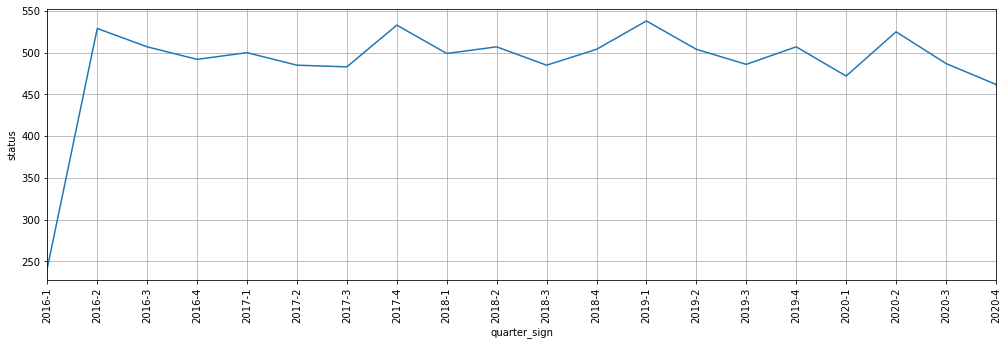

In [44]:
plt.figure(figsize=(17,5))
sns.lineplot(x='quarter_sign', y='status',
             data=new_df.groupby(['quarter_sign']).count().reset_index())

"""plt.axvline('2020-08', color='darkblue')
plt.axvspan('2020-08', '2021-02', alpha=0.3, color='lightblue')"""

plt.xlim('2016-1', '2020-4')
plt.xticks(rotation=90)
plt.grid();

## Gráfico indicativo do número de cadastros por mês ao longo do tempo separado por região geográfica

* Norte e Nordeste são as regiões que mais puxam novas assinaturas
* Relacionando com o gráfico acima, é possível observar que a região Nordeste teve picos e vales extremos a partir de Agosto de 2020
* A região Sul deve o seur maior vale em Outubro de 2020, ficando abaixo de 10 cadastros pela primeira vez

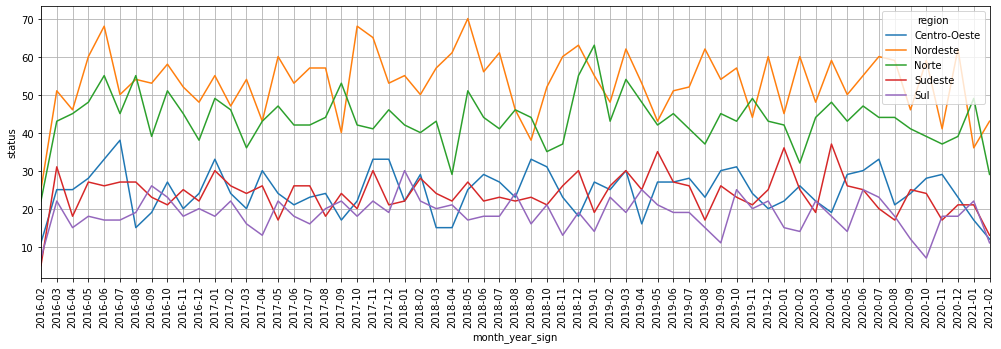

In [20]:
plt.figure(figsize=(17,5))
sns.lineplot(x='month_year_sign', y='status', hue='region',
             data=new_df.groupby(['month_year_sign', 'region']).count().reset_index())
plt.xlim('2016-02', '2021-02')
plt.xticks(rotation=90)
plt.grid();

### No 4º trimestre de 2020 a região Norte registrou o menor numero de cadastros em todo o periodo observado

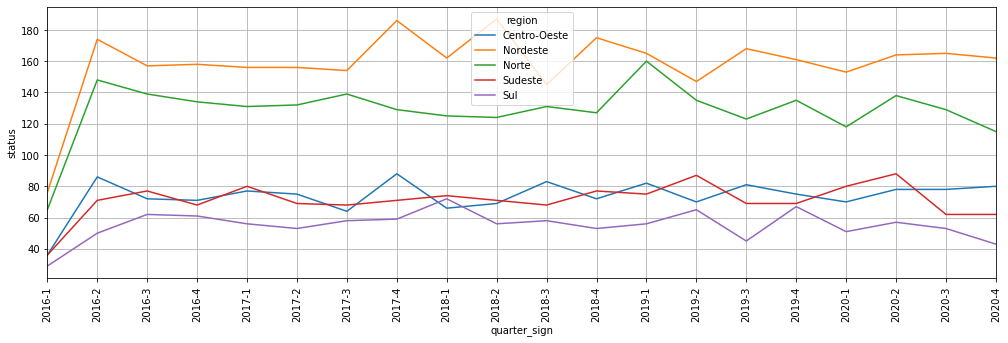

In [45]:
plt.figure(figsize=(17,5))
sns.lineplot(x='quarter_sign', y='status', hue='region',
             data=new_df.groupby(['quarter_sign', 'region']).count().reset_index())
plt.xlim('2016-1', '2020-4')
plt.xticks(rotation=90)
plt.grid();

## Gráfico indicativo do número de cadastros por mês ao longo do tempo se parado por canal em que o cadastro de assinatura foi realizado

Se destacam os canais:
- Organic Search
- Direct

Os demais possuem ritmo semelhante ao longo do tempo observado

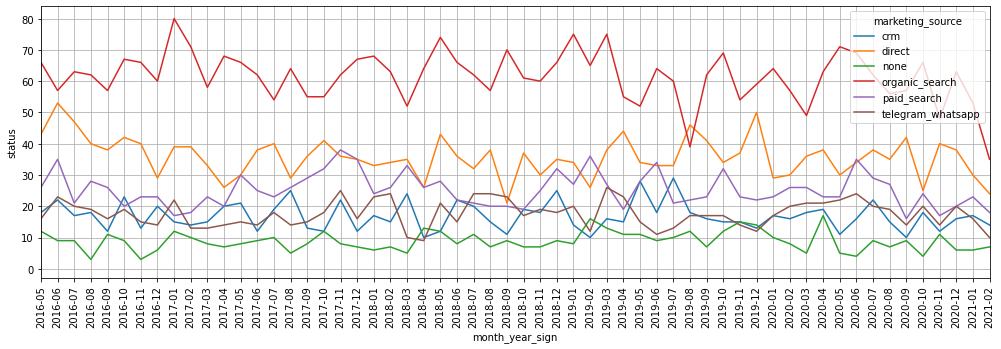

In [22]:
plt.figure(figsize=(17,5))
sns.lineplot(x='month_year_sign', y='status', hue='marketing_source',
             data=new_df.groupby(['month_year_sign', 'marketing_source']).count().reset_index())
plt.xlim('2016-05', '2021-02')
plt.xticks(rotation=90)
plt.grid();

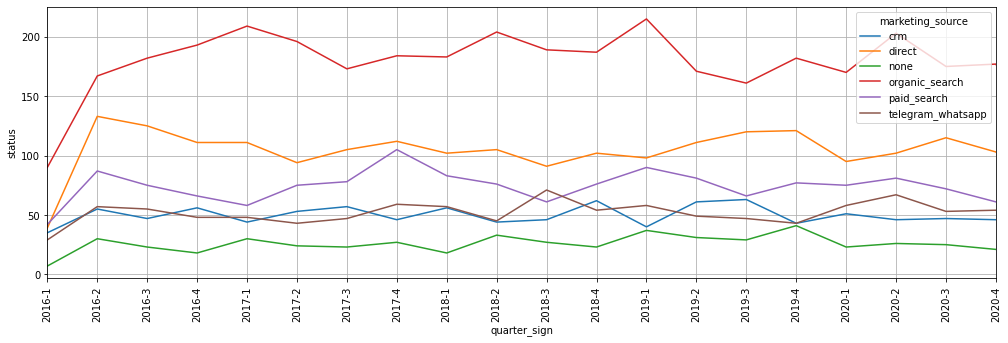

In [48]:
plt.figure(figsize=(17,5))
sns.lineplot(x='quarter_sign', y='status', hue='marketing_source',
             data=new_df.groupby(['quarter_sign', 'marketing_source']).count().reset_index())
plt.xlim('2016-1', '2020-4')
plt.xticks(rotation=90)
plt.grid();

## Gráfico indicativo do número de cancelamentos por mês ao longo do tempo

Apesar de o numero de novos cadastros terem se mantido constantes ao longo do tempo, seja por região ou por canal de cadastro, a partir de Agosto de 2018 o número de cancelamentos teve um ligeiro aumento, com um aumento mais pronunciado a partir do período final do ano de 2019.

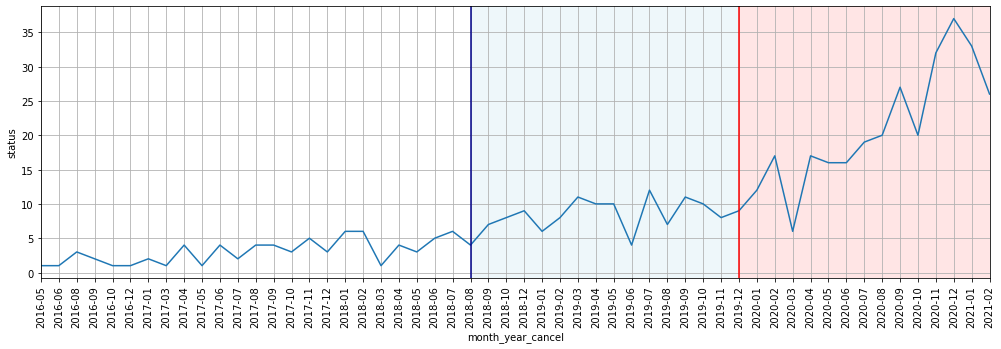

In [23]:
plt.figure(figsize=(17,5))
sns.lineplot(x='month_year_cancel', y='status', 
             data=new_df.groupby(['month_year_cancel']).count().reset_index())

plt.xlim('2016-05', '2021-02')
plt.xticks(rotation=90)

plt.axvline('2018-08', color='darkblue')
plt.axvline('2019-12', color='red')
plt.axvspan('2018-08', '2019-12', alpha=0.2, color='lightblue')
plt.axvspan('2019-12', '2021-02', alpha=0.1, color='red')

plt.grid();

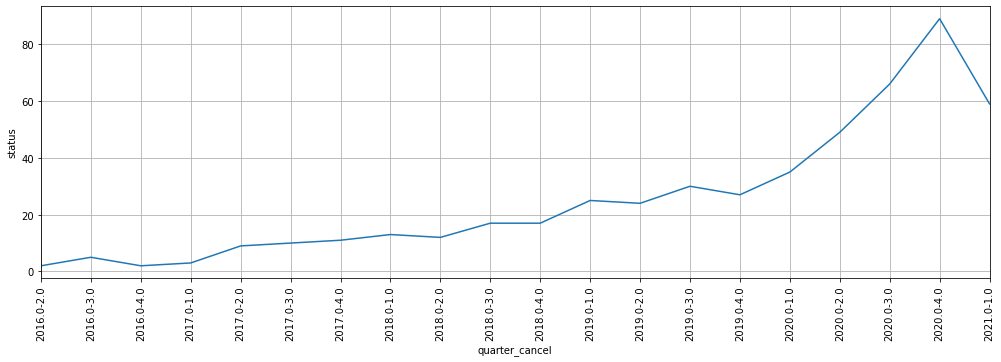

In [25]:
plt.figure(figsize=(17,5))
sns.lineplot(x='quarter_cancel', y='status', 
             data=new_df.groupby(['quarter_cancel']).count().reset_index())

plt.xlim('2016.0-2.0', '2021.0-1.0')
plt.xticks(rotation=90)

plt.grid();

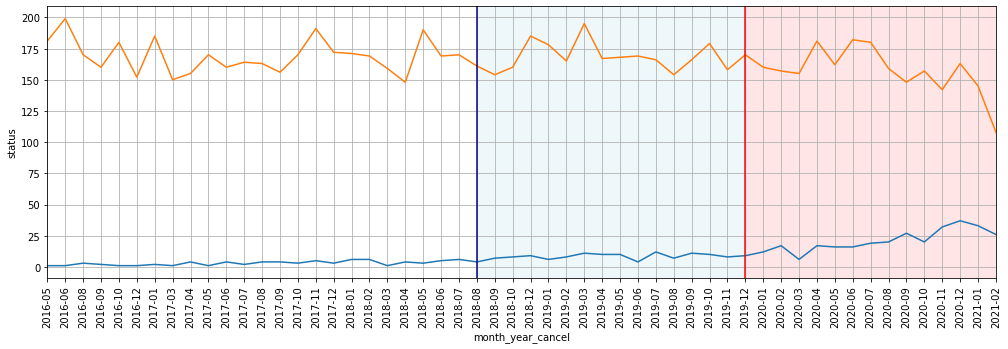

In [26]:
plt.figure(figsize=(17,5))
sns.lineplot(x='month_year_cancel', y='status', 
             data=new_df.groupby(['month_year_cancel']).count().reset_index())
sns.lineplot(x='month_year_sign', y='status',
             data=new_df.groupby(['month_year_sign']).count().reset_index())




plt.xlim('2016-05', '2021-02')
plt.xticks(rotation=90)

plt.axvline('2018-08', color='darkblue')
plt.axvline('2019-12', color='red')
plt.axvspan('2018-08', '2019-12', alpha=0.2, color='lightblue')
plt.axvspan('2019-12', '2021-02', alpha=0.1, color='red')

plt.grid();

## Gráfico indicativo do número de cancelamentos por mês ao longo do tempo por região geográfica

A partir de Outubro de 2019 o número de cancelamentos por região em geral fica mais evidente, principalmente para as regiões Norte e Nordeste, essas que são as que lideram desde sempre o número de novos cadastros por mês.

É possível notar que o pico de cancelamento de ambas as regiões acontece em torno do final do ano de 2020.

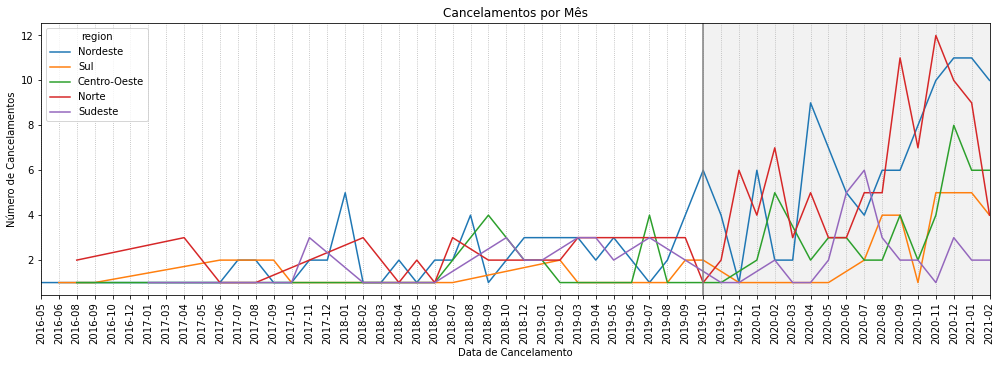

In [27]:
plt.figure(figsize=(17,5))
sns.lineplot(x='month_year_cancel', y='status', 
             hue='region', 
             data=new_df.groupby(['month_year_cancel', 'region']).count().reset_index())

plt.xlabel('Data de Cancelamento')
plt.ylabel('Número de Cancelamentos')
plt.xticks(rotation=90)
plt.xlim('2016-05', '2021-02')

plt.axvline('2019-10', color='gray')
plt.axvspan('2019-10', '2021-02', alpha=0.1, color='gray')


plt.title('Cancelamentos por Mês')

plt.grid(linestyle=':', axis='x');

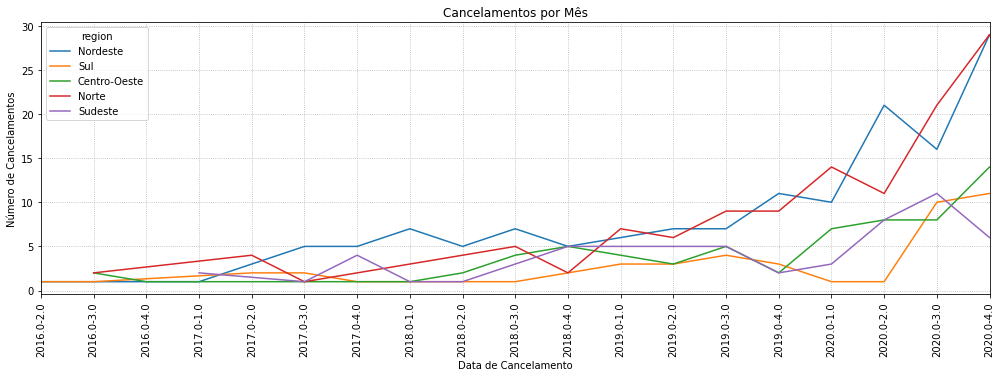

In [28]:
plt.figure(figsize=(17,5))
sns.lineplot(x='quarter_cancel', y='status', 
             hue='region', 
             data=new_df.groupby(['quarter_cancel', 'region']).count().reset_index())

plt.xlabel('Data de Cancelamento')
plt.ylabel('Número de Cancelamentos')
plt.xticks(rotation=90)
plt.xlim('2016.0-2.0', '2020.0-4.0')

#plt.axvline('2019-10', color='gray')
#plt.axvspan('2019-10', '2021-02', alpha=0.1, color='gray')


plt.title('Cancelamentos por Mês')

plt.grid(linestyle=':');

## Gráfico indicativo do número de cancelamentos por mês ao longo do tempo por região geográfica por canal em que o cadastro de assinatura foi realizado

A maior movimentação de cancelamentos acontece principalmente após Outubro de 2019, no canal de busca orgânica. O pico acontece na mesma época em que as maiores desistência de Norte e Nordeste ocorrem, final do ano de 2020. Vale salientar que o canal de Direct também é destacado nesse período.



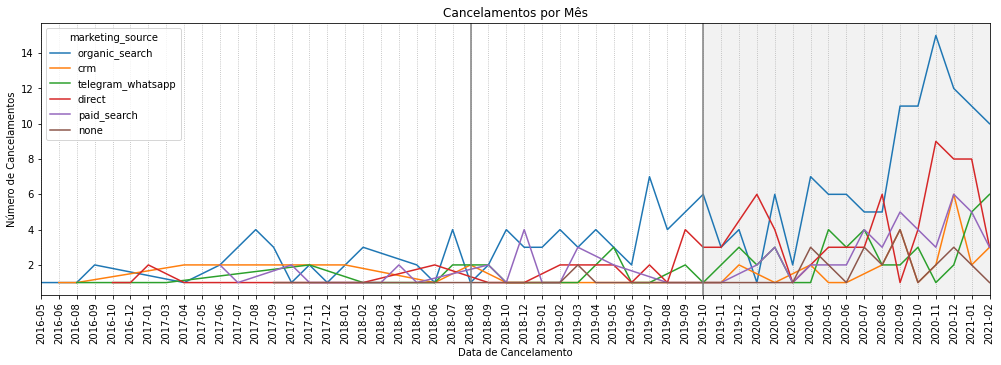

In [29]:
plt.figure(figsize=(17,5))
sns.lineplot(x='month_year_cancel', y='status', 
             hue='marketing_source', 
             data=new_df.groupby(['month_year_cancel', 'marketing_source']).count().reset_index())

plt.xlabel('Data de Cancelamento')
plt.ylabel('Número de Cancelamentos')
plt.xticks(rotation=90)
plt.xlim('2016-05', '2021-02')

plt.axvline('2018-08', color='gray')
plt.axvline('2019-10', color='gray')
plt.axvspan('2019-10', '2021-02', alpha=0.1, color='gray')

plt.title('Cancelamentos por Mês')

plt.grid(linestyle=':', axis='x');

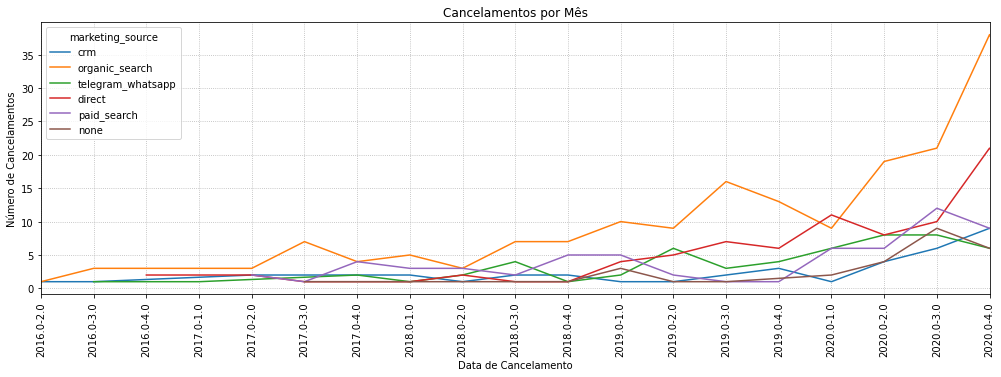

In [30]:
plt.figure(figsize=(17,5))
sns.lineplot(x='quarter_cancel', y='status', 
             hue='marketing_source', 
             data=new_df.groupby(['quarter_cancel', 'marketing_source']).count().reset_index())

plt.xlabel('Data de Cancelamento')
plt.ylabel('Número de Cancelamentos')
plt.xticks(rotation=90)
plt.xlim('2016.0-2.0', '2020.0-4.0')

plt.title('Cancelamentos por Mês')

plt.grid(linestyle=':');

## O que as assinaturas canceladas a partir de Outubro de 2019 têm em comum?

In [31]:
apos= new_df[new_df['month_year_cancel'] >= '2019-10']
antes = new_df[new_df['month_year_cancel'] < '2019-10']

In [32]:
antes_N = antes[(antes['region'] == 'Nordeste') | (antes['region'] == 'Norte')]
apos_N = apos[(apos['region'] == 'Nordeste') | (apos['region'] == 'Norte')]

In [33]:
antes[(antes['region'] == 'Nordeste') | (antes['region'] == 'Norte')].describe()

,average_ticket,items_quantity,all_revenue,all_orders,recency,time_lastbuy,client_cancel_age,client_time
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,216.598656,8.951456,998.752874,4.601942,1123.689320,202.932039,49.058252,388.155340
std,22.991867,2.911703,748.990114,3.379116,300.665765,212.178211,17.010853,324.754349
min,155.327863,1.000000,0.000000,0.000000,548.000000,0.000000,22.000000,7.000000
25%,203.335536,7.000000,358.271439,2.000000,874.500000,32.000000,34.500000,103.000000
50%,215.832445,9.000000,876.135930,4.000000,1162.000000,114.000000,48.000000,267.000000
75%,232.447387,11.000000,1509.108739,7.000000,1316.000000,331.500000,63.500000,653.500000
max,274.374620,16.000000,2652.184140,11.000000,1820.000000,787.000000,79.000000,1187.000000


In [34]:
apos[(apos['region'] == 'Nordeste') | (apos['region'] == 'Norte')].describe()

,average_ticket,items_quantity,all_revenue,all_orders,recency,time_lastbuy,client_cancel_age,client_time
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,218.229738,8.658537,1085.971413,4.980488,456.517073,261.619512,52.560976,534.956098
std,21.454856,3.008238,759.547631,3.449866,340.370165,315.313106,16.311984,495.069111
min,153.919543,1.000000,0.000000,0.000000,1.000000,0.000000,24.000000,0.000000
25%,201.556981,7.000000,448.552746,2.000000,198.000000,29.000000,38.000000,133.000000
50%,220.381704,9.000000,1004.027159,5.000000,395.000000,154.000000,54.000000,334.000000
75%,232.135380,10.000000,1732.980402,8.000000,592.000000,383.000000,67.000000,829.000000
max,266.225129,18.000000,2671.727423,11.000000,1574.000000,1516.000000,81.000000,1771.000000


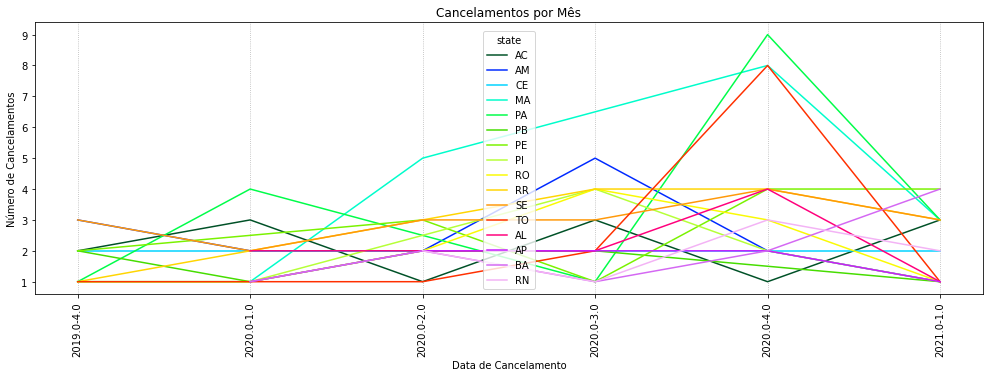

In [35]:
plt.figure(figsize=(17,5))
sns.lineplot(x='quarter_cancel', y='status', 
             hue='state', 
             data=apos_N.groupby(['quarter_cancel', 'state']).count().reset_index(), palette='gist_ncar')

plt.xlabel('Data de Cancelamento')
plt.ylabel('Número de Cancelamentos')
plt.xticks(rotation=90)
"""plt.xlim('2019-10', '2021-02')

plt.axvline('2019-10', color='gray')
plt.axvspan('2019-10', '2021-02', alpha=0.1, color='gray')"""


plt.title('Cancelamentos por Mês')

plt.grid(linestyle=':', axis='x');

# MA, TO, PA

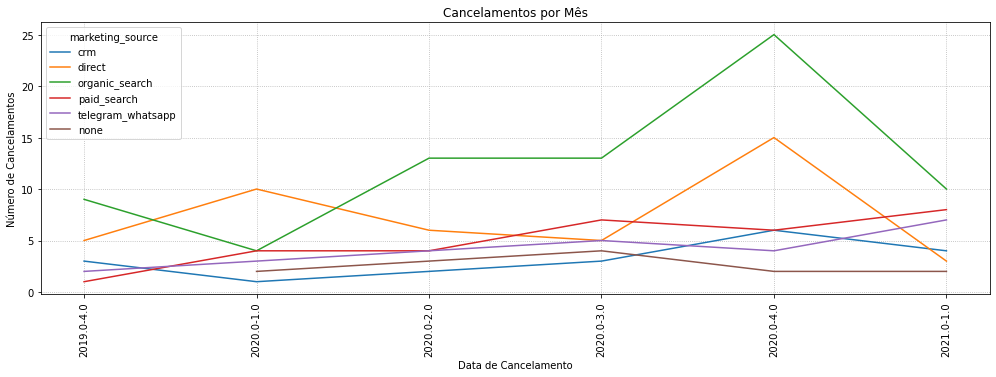

In [36]:
plt.figure(figsize=(17,5))
sns.lineplot(x='quarter_cancel', y='status', 
             hue='marketing_source', 
             data=apos_N.groupby(['quarter_cancel', 'marketing_source']).count().reset_index())

plt.xlabel('Data de Cancelamento')
plt.ylabel('Número de Cancelamentos')
plt.xticks(rotation=90)
#plt.xlim('2016.0-4.0', '2021.0-1.0')

plt.title('Cancelamentos por Mês')

plt.grid(linestyle=':');

In [37]:
new_df[((new_df['state'] == 'MA') |
       (new_df['state'] == 'TO') |
       (new_df['state'] == 'PA')) &
       (new_df['status'] == 'canceled')&
       (new_df['month_year_cancel'] >= '2019-10')].describe()

,average_ticket,items_quantity,all_revenue,all_orders,recency,time_lastbuy,client_cancel_age,client_time
count,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000
mean,216.421906,7.760000,1209.308139,5.62000,437.080000,270.680000,53.020000,542.660000
std,20.280751,2.638491,783.961267,3.64154,350.354097,317.736603,16.483127,494.578881
min,153.919543,3.000000,0.000000,0.00000,1.000000,0.000000,25.000000,0.000000
25%,200.020930,6.000000,470.693457,2.00000,143.750000,38.750000,38.000000,146.250000
50%,218.108189,8.000000,1255.486179,6.00000,367.500000,164.000000,51.500000,350.000000
75%,232.166208,10.000000,1789.289016,8.00000,590.750000,329.250000,66.500000,738.750000
max,255.040268,13.000000,2671.727423,11.00000,1455.000000,1324.000000,81.000000,1683.000000


In [38]:
new_df[((new_df['state'] == 'MA') |
       (new_df['state'] == 'TO') |
       (new_df['state'] == 'PA')) &
       (new_df['status'] == 'canceled')&
       (new_df['month_year_cancel'] >= '2019-10')].describe(include=['object', 'int', 'float'])

,status,version,city,state,neighborhood,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source,time_lastbuy,client_cancel_age,client_time,region,month_year_cancel,month_year_sign,quarter_sign,quarter_cancel
count,50,50,50,50,50,50.000000,50.000000,50.000000,50.00000,50.000000,50,50.000000,50.000000,50.000000,50,50,50,50,50
unique,1,49,47,3,47,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,2,14,32,17,6
top,canceled,4.28.11,Gonçalves Verde,PA,Alto Caiçaras,NaN,NaN,NaN,NaN,NaN,organic_search,NaN,NaN,NaN,Norte,2020-11,2018-08,2020-3,2020.0-4.0
freq,50,2,2,18,2,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,32,12,3,6,25
mean,NaN,NaN,NaN,NaN,NaN,216.421906,7.760000,1209.308139,5.62000,437.080000,NaN,270.680000,53.020000,542.660000,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,20.280751,2.638491,783.961267,3.64154,350.354097,NaN,317.736603,16.483127,494.578881,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,153.919543,3.000000,0.000000,0.00000,1.000000,NaN,0.000000,25.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,200.020930,6.000000,470.693457,2.00000,143.750000,NaN,38.750000,38.000000,146.250000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,218.108189,8.000000,1255.486179,6.00000,367.500000,NaN,164.000000,51.500000,350.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,232.166208,10.000000,1789.289016,8.00000,590.750000,NaN,329.250000,66.500000,738.750000,NaN,NaN,NaN,NaN,NaN


In [39]:
new_df[((new_df['state'] == 'MA') |
       (new_df['state'] == 'TO') |
       (new_df['state'] == 'PA')) &
       (new_df['status'] == 'canceled')&
       (new_df['month_year_cancel'] < '2019-10')].describe(include=['object', 'int', 'float'])

,status,version,city,state,neighborhood,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source,time_lastbuy,client_cancel_age,client_time,region,month_year_cancel,month_year_sign,quarter_sign,quarter_cancel
count,19,19,19,19,19,19.000000,19.000000,19.000000,19.000000,19.000000,19,19.000000,19.000000,19.000000,19,19,19,19,19
unique,1,19,19,3,19,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,2,11,14,7,8
top,canceled,4.4.9,Correia do Norte,TO,Vila União,NaN,NaN,NaN,NaN,NaN,organic_search,NaN,NaN,NaN,Norte,2019-07,2016-08,2016-3,2019.0-2.0
freq,19,1,1,10,1,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,14,3,3,5,5
mean,NaN,NaN,NaN,NaN,NaN,215.145123,8.736842,1005.833400,4.526316,1090.052632,NaN,236.894737,46.789474,497.105263,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,23.445945,3.211820,850.145160,3.611224,324.251869,NaN,248.162558,16.369277,358.285717,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,159.998719,4.000000,0.000000,0.000000,652.000000,NaN,6.000000,24.000000,22.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,198.368111,6.000000,220.942888,1.000000,828.500000,NaN,21.500000,36.000000,137.500000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,216.681251,9.000000,719.449177,3.000000,1020.000000,NaN,130.000000,41.000000,599.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,233.399328,11.000000,1559.346305,7.000000,1332.500000,NaN,442.500000,60.500000,801.000000,NaN,NaN,NaN,NaN,NaN


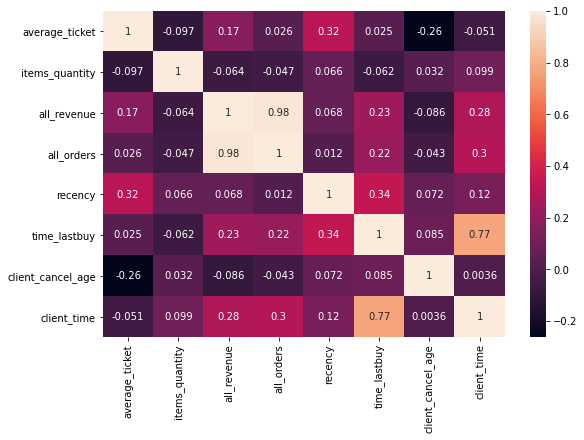

In [40]:
plt.figure(figsize=(9,6))
sns.heatmap(antes_N[antes_N['status'] == 'canceled'].corr(), annot=True);

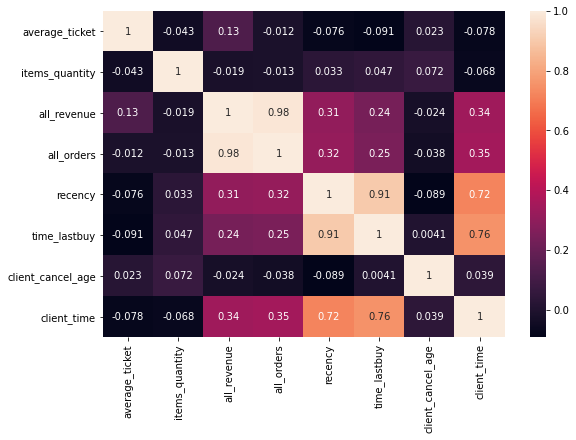

In [41]:
plt.figure(figsize=(9,6))
sns.heatmap(apos_N[apos_N['status'] == 'canceled'].corr(), annot=True);

In [42]:
new_df[
    ((new_df['state'] == 'MA') |
    (new_df['state'] == 'TO') |
    (new_df['state'] == 'PA')) &
    (new_df['status'] == 'canceled')&
    (new_df['month_year_cancel'] >= '2019-10')].count()/ new_df[
    (new_df['status'] == 'canceled')&
    (new_df['month_year_cancel'] >= '2019-10')].count()

created_at            0.153846
updated_at            0.153846
deleted_at            0.153846
birth_date            0.153846
status                0.153846
version               0.153846
city                  0.153846
state                 0.153846
neighborhood          0.153846
last_date_purchase    0.153846
average_ticket        0.153846
items_quantity        0.153846
all_revenue           0.153846
all_orders            0.153846
recency               0.153846
marketing_source      0.153846
time_lastbuy          0.153846
client_cancel_age     0.153846
client_time           0.153846
region                0.153846
month_year_cancel     0.153846
month_year_sign       0.153846
quarter_sign          0.153846
quarter_cancel        0.153846
dtype: float64

In [ ]:
## Antes

antes_1019[antes_1019['status'] == 'canceled']['region'].value_counts()

In [ ]:
## Antes

antes_1019[antes_1019['status'] == 'canceled']['marketing_source'].value_counts()

In [ ]:
## Após

pos_1019[pos_1019['status'] == 'canceled']['region'].value_counts()

In [ ]:
## Após

pos_1019[pos_1019['status'] == 'canceled']['marketing_source'].value_counts()

In [ ]:
plt.figure(figsize=(17,5))
sns.lineplot(x='month_year_sign', y='status',
             data=antes_1019.groupby(['month_year_sign']).count().reset_index())
plt.xlim('2016-05', '2019-10')
plt.xticks(rotation=90)
plt.grid();

In [ ]:
plt.figure(figsize=(17,5))
sns.lineplot(x='month_year_sign', y='status',
             data=pos_1019.groupby(['month_year_sign']).count().reset_index())
plt.xlim('2016-05', '2019-10')
plt.xticks(rotation=90)
plt.grid();

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(antes_1019.corr(), annot=True);

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(pos_1019.corr(), annot=True);

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17, 6))

ax[0].hist(x=antes_1019['client_time'], bins=20)
ax[0].set_title('Antes 10/2019')
ax[0].grid()
ax[0].set_ylim(0,70)
ax[0].set_xlim(0,1800)

ax[1].hist(x=pos_1019['client_time'], bins=20)
ax[1].set_title('Pós 10/2019')
ax[1].grid()
ax[1].set_ylim(0,70)
ax[0].set_xlim(0,1800);

In [ ]:
pd.pivot_table(new_df,index="month_year_last_purchase", 
                            columns="status",
                            aggfunc="count",
                            values='all_orders',
                            fill_value=0)

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

data = [antes_1019['client_time'], pos_1019['client_time']]

positions = [1, 2] # posição de cada boxplot no eixo x

ax.boxplot(data, positions=positions)

ax.set_xticks(positions)
ax.set_xticklabels(['Antes 10/2019', 'Pós 10/2019'])
ax.set_title('Boxplots Antes e Pós 10/2019')
ax.grid(True)

plt.show()

In [ ]:
plt.figure(figsize=(13,7))
sns.boxplot(x='client_time', y='marketing_source', data=antes_1019)
plt.grid()

In [ ]:
plt.figure(figsize=(13,7))
sns.boxplot(x='client_time', y='marketing_source', data=pos_1019)
plt.grid()

In [ ]:
new_df.to_csv('teste.csv')

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='revenue/orders', y='status', data=new_df)
plt.grid();

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(new_df['time_lastbuy'], color='purple')
plt.grid();

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(new_df['recency'].where(new_df['status'] == 'paused'), color='magenta')
plt.grid();

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(new_df['client_cancel_age'], color='orange')
plt.grid();

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='items_quantity', y='status', data=new_df)
plt.grid();

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='all_orders', y='status', data=new_df)
plt.grid();

In [ ]:
new_df.describe()

In [ ]:
new_df['status'].value_counts()

In [ ]:
pausado = new_df[new_df['status'] == 'paused']
ativo = new_df[new_df['status'] == 'active']
cancelado = new_df[new_df['status'] == 'canceled'] 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.figure(figsize=(12,8))

sns.heatmap(cancelado.corr(), annot=True)

In [ ]:
new_df.head()

In [ ]:
df_ml = new_df.copy()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

df_ml.drop(['created_at', 'deleted_at', 'birth_date', 
            'version', 'city', 'state', 'neighborhood',
           'last_date_purchase', 'average_ticket', 
            'time_lastbuy', 'client_cancel_age', 'revenue/orders'], axis=1, inplace=True)

df_ml = df_ml[df_ml['status'] != 'paused']

df_ml['status'] = df_ml['status'].map({'active': 0,
                                       'canceled': 1})

X = df_ml.drop('status', axis=1)
X = pd.get_dummies(X)
y = df_ml['status']

In [ ]:
X.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(X)
X_pca = pca.transform(X)

In [ ]:
X_pca.shape

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, stratify=y, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

In [ ]:
logreg.score(X_test, y_test)

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
from sklearn import metrics

sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
skf = StratifiedKFold(5)

param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

grid_log = GridSearchCV(logreg, cv=skf, verbose=2, param_grid=param_grid,scoring = 'recall')
grid_log.fit(X_train, y_train)
grid_log.best_score_

In [ ]:
y_pred_2 = grid_log.predict(X_test)

sns.heatmap(metrics.confusion_matrix(y_test, y_pred_2), annot=True)

In [ ]:
model = grid_log.best_estimator_

In [ ]:
pd.DataFrame(model.coef_)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)
y_pred_etc = etc.predict(X_test)

metrics.recall_score(y_test, y_pred_etc)

In [ ]:
metrics.confusion_matrix(y_test, y_pred_2)

In [ ]:
pd.DataFrame(etc.feature_importances_).sort_values(0, ascending=False)

In [ ]:
from sklearn.metrics import 